# Lab Work 3 : Clustering / Analyzing Stock Movements

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fn = 'data/company-stock-movements-2010-2015.csv'
stocks_df = pd.read_csv(fn, index_col=0)

In [105]:
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [18]:
companies = list(stocks_df.index)
movements = stocks_df.values
print(companies)

['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']


In [104]:
companies.index('Sony'), companies.index('Canon')

(45, 7)

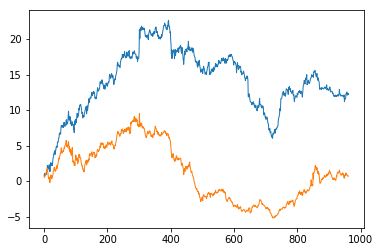

In [103]:
x = np.arange(movements.shape[1])

sony  = movements[7].cumsum()
canon = movements[45].cumsum()

plt.plot(x, sony, lw=1)
plt.plot(x, canon, lw=1)

plt.show()

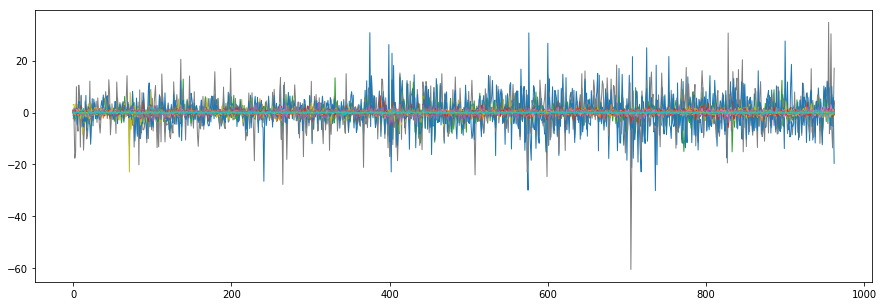

In [73]:
width = 15
height = 5
plt.figure(figsize=(width, height))

plt.plot(np.arange(movements.shape[1]), np.transpose(movements), lw=1)
plt.show()

In [68]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

normalizer = Normalizer()
kmeans = KMeans(n_clusters=20)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)
labels = pipeline.predict(movements)

In [69]:
df = pd.DataFrame({'labels': labels, 'companies': companies})
df.sort_values('labels')

,companies,labels
30,MasterCard,0
26,JPMorgan Chase,1
16,General Electrics,1
5,Bank of America,1
18,Goldman Sachs,1
3,American express,1
1,AIG,1
55,Wells Fargo,1
23,IBM,2
25,Johnson & Johnson,2


---
# Introdution to hierarchical clustering


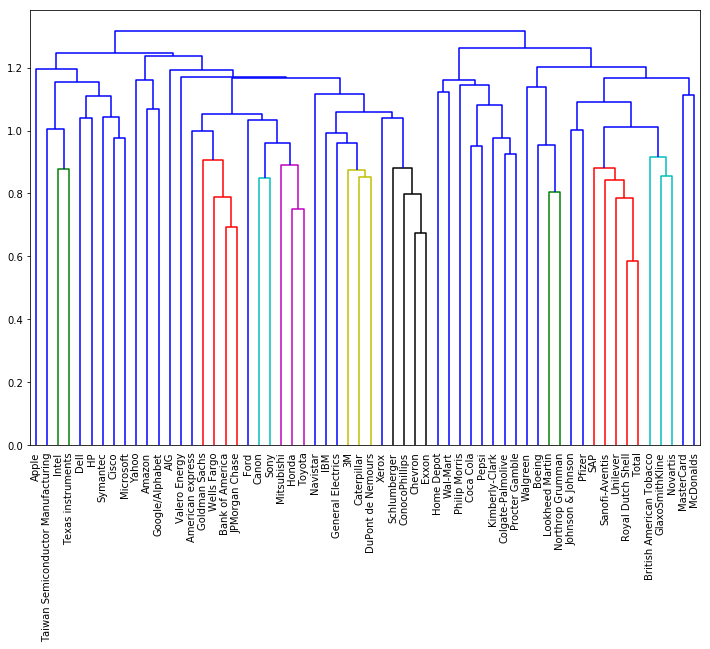

In [59]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

width = 12
height = 8
plt.figure(figsize=(width, height))

normalized_movements = normalize(movements)
mergings = linkage(normalized_movements, method='complete')
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [ ]:
x = np.arange(movements.shape[1])

sony  = movements[7].cumsum()
canon = movements[45].cumsum()

plt.plot(x, sony, lw=1)
plt.plot(x, canon, lw=1)

plt.show()